In [1]:
#Grab Data
import yfinance as yf

#Usual Suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

In [ ]:
## web scraping list of symbols in DJIA from wiki

In [17]:
df2 = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]

In [18]:
df2

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,2.41%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.02%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,5.48%
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,2.84%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.36%
5,Caterpillar,NYSE,CAT,Construction and mining,1991-05-06,NaN,4.52%
6,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,3.50%
7,Cisco,NASDAQ,CSCO,Information technology,2009-06-08,NaN,0.96%
8,Coca-Cola,NYSE,KO,Drink industry,1987-03-12,Also 1932-05-26 to 1935-11-20,1.22%
9,Disney,NYSE,DIS,Broadcasting and entertainment,1991-05-06,NaN,1.89%


In [20]:
Tickers=df2.Symbol.to_list()

In [21]:
Tickers

['MMM',
 'AXP',
 'AMGN',
 'AAPL',
 'BA',
 'CAT',
 'CVX',
 'CSCO',
 'KO',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'CRM',
 'TRV',
 'UNH',
 'VZ',
 'V',
 'WBA',
 'WMT']

In [44]:
## Download Stock prices data

Prices = yf.download(Tickers, start = "2023-01-01", end = "2023-09-01")

[*********************100%***********************]  30 of 30 completed


In [45]:
Prices.head(10)

Adj Close                                                  \
                  AAPL        AMGN         AXP          BA         CAT   
Date                                                                     
2023-01-03  124.538658  254.873413  145.571487  195.389999  235.297394   
2023-01-04  125.823189  257.542480  148.955475  203.639999  237.740189   
2023-01-05  124.488869  259.948486  145.390961  204.990005  236.676376   
2023-01-06  129.069336  268.072510  149.104416  213.000000  245.127701   
2023-01-09  129.597076  263.124054  149.332794  208.570007  242.921295   
2023-01-10  130.174622  266.786682  150.921432  206.690002  246.752945   
2023-01-11  132.922897  265.841797  152.827805  208.029999  246.969650   
2023-01-12  132.843231  263.903351  153.820709  214.320007  251.244583   
2023-01-13  134.187485  264.692352  154.654755  214.130005  254.583710   
2023-01-17  135.362488  262.442169  152.659012  211.410004  252.416733   

                                                                     ...  \
                   CRM       CSCO         CVX        DIS        DOW  ...   
Date                                                                 ...   
2023-01-03  134.779999  46.850143  169.167114  88.970001  49.090569  ...   
2023-01-04  139.589996  46.840294  167.368393  91.980003  50.331303  ...   
2023-01-05  136.339996  46.180294  170.382477  91.919998  50.889149  ...   
2023-01-06  140.509995  47.598801  171.665878  93.919998  52.918556  ...   
2023-01-09  147.100006  47.854923  170.324112  94.769997  53.168621  ...   
2023-01-10  147.440002  48.081490  171.160263  95.559998  54.313175  ...   
2023-01-11  144.899994  48.475517  170.343582  96.330002  55.380775  ...   
2023-01-12  149.600006  48.268654  172.171448  99.809998  56.284874  ...   
2023-01-13  149.509995  48.150444  172.638138  99.400002  56.438766  ...   
2023-01-17  148.470001  47.362389  175.486954  99.910004  55.207657  ...   

              Volume                                                           \
                 MRK      MSFT       NKE       PG      TRV      UNH         V   
Date                                                                            
2023-01-03   8062500  25740000   8124800  6447300   983400  3525600   4202800   
2023-01-04   8698600  50623400   8550700  7313400  1015300  5070400   6606200   
2023-01-05   9578900  39585600   6046700  5373800   973500  5497100   5246000   
2023-01-06   8632300  43613600  10080700  7882200  1282200  4841300   6829700   
2023-01-09  12858800  27369800   9397900  5727000  1111600  3702800   6294500   
2023-01-10  12122800  27033900   5899900  4716400   959100  3164000  10857000   
2023-01-11   8626500  28669300   6989200  8691300   956400  4274200   5408200   
2023-01-12   8914800  27269500   8366400  7801600   761100  3726800   4264400   
2023-01-13   5757800  21333300   4856500  5535800  1005300  5390100   4283200   
2023-01-17  10241100  29831300   6172200  9611800  3883700  4495600   6101100   

                                         
                  VZ       WBA      WMT  
Date                                     
2023-01-03  31330700   7377200  5749900  
2023-01-04  28779500   7987000  4446100  
2023-01-05  29987200  19328200  4424800  
2023-01-06  26010400  10009800  7077300  
2023-01-09  23062200   9435000  5918900  
2023-01-10  16695300   6341200  3990200  
2023-01-11  20674800   6098700  4944900  
2023-01-12  16980300   6056100  4157600  
2023-01-13  17229800   4178900  4566600  
2023-01-17  28697000   6820200  5040800  

[10 rows x 180 columns]

In [46]:
# Return Year to date

close = Prices.loc[: , "Close"].copy()

In [48]:
normclose=close.div(close.iloc[0]).mul(100)

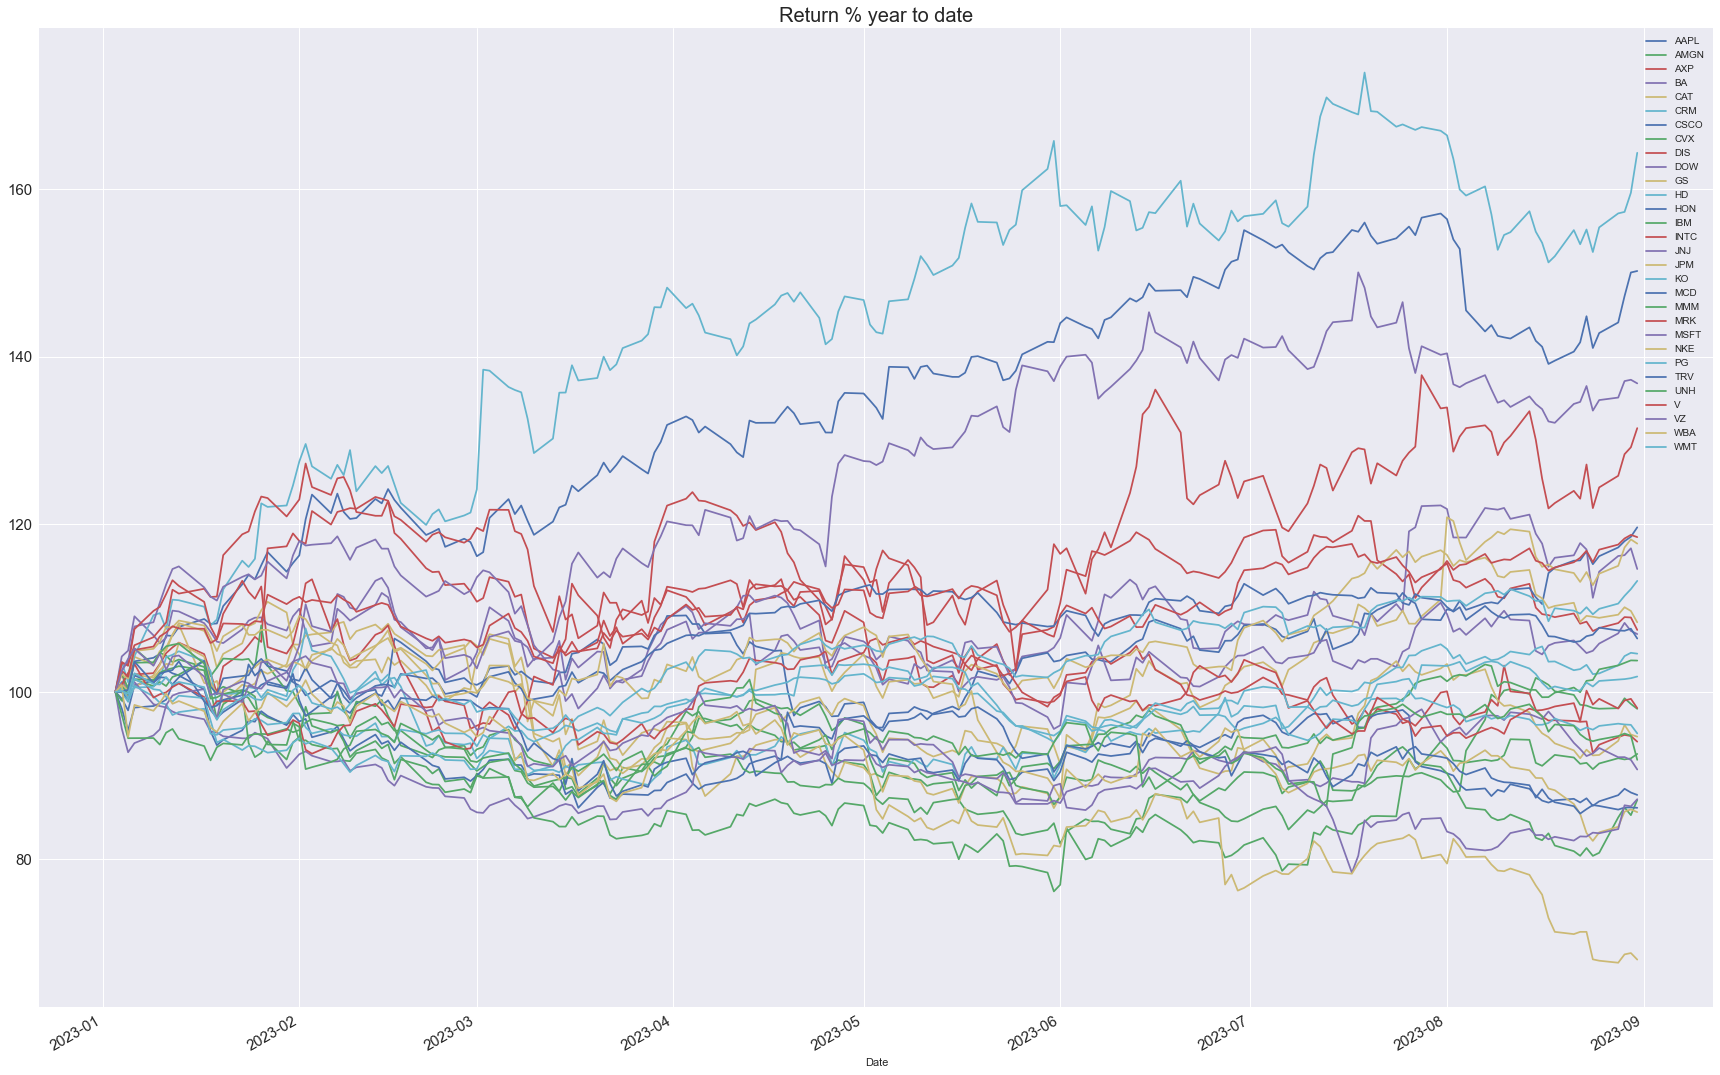

In [57]:
%matplotlib inline
plt.style.use("seaborn")
normclose.plot(figsize=(30,20), fontsize=15)
plt.legend(fontsize=10)
plt.title("Return % year to date", fontsize = 20)
plt.show()

In [ ]:
### Grab fundamental data

In [22]:
infos = []

for i in Tickers:
    infos.append(yf.Ticker(i).info)
    

In [24]:
pd2 = pd.DataFrame(infos)

In [25]:
pd2

,address1,city,state,zip,country,phone,website,industry,industryDisp,sector,...,operatingMargins,financialCurrency,trailingPegRatio,payoutRatio,trailingPE,earningsQuarterlyGrowth,earningsGrowth,fax,address2,industrySymbol
0,3M Center,Saint Paul,MN,55144-1000,United States,651 733 1110,https://www.3m.com,Conglomerates,Conglomerates,Industrials,...,0.17075,USD,3.5261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200 Vesey Street,New York,NY,10285,United States,212 640 2000,https://www.americanexpress.com,Credit Services,Credit Services,Financial Services,...,0.18352,USD,0.9966,0.2276,16.276705,0.107,0.125,NaN,NaN,NaN
2,One Amgen Center Drive,Thousand Oaks,CA,91320-1799,United States,805 447 1000,https://www.amgen.com,Drug Manufacturers—General,Drug Manufacturers—General,Healthcare,...,0.38443,USD,1.8714,0.5485,17.128119,0.047,0.049,805 447 1010,NaN,NaN
3,One Apple Park Way,Cupertino,CA,95014,United States,408 996 1010,https://www.apple.com,Consumer Electronics,Consumer Electronics,Technology,...,0.29231,USD,2.4162,0.1560,31.775545,0.023,0.050,NaN,NaN,NaN
4,929 Long Bridge Drive,Arlington,VA,22202,United States,703 465 3500,https://www.boeing.com,Aerospace & Defense,Aerospace & Defense,Industrials,...,-0.01132,USD,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,USD,1.4582,NaN,20.830622,NaN,NaN,NaN,NaN,NaN
6,6001 Bollinger Canyon Road,San Ramon,CA,94583-2324,United States,925 842 1000,https://www.chevron.com,Oil & Gas Integrated,Oil & Gas Integrated,Energy,...,0.16987,USD,NaN,0.3716,10.562183,-0.483,-0.462,NaN,NaN,NaN
7,170 West Tasman Drive,San Jose,CA,95134-1706,United States,408 526 4000,https://www.cisco.com,Communication Equipment,Communication Equipment,Technology,...,0.27334,USD,3.0199,0.5016,18.651466,0.406,0.422,NaN,NaN,NaN
8,One Coca-Cola Plaza,Atlanta,GA,30313,United States,404 676 2121,https://www.coca-colacompany.com,Beverages—Non-Alcoholic,Beverages—Non—Alcoholic,Consumer Defensive,...,0.28598,USD,2.9450,0.7469,24.406637,0.337,0.339,NaN,NaN,NaN
9,500 South Buena Vista Street,Burbank,CA,91521,United States,818 560 1000,https://www.thewaltdisneycompany.com,Entertainment,Entertainment,Communication Services,...,0.08798,USD,0.7325,0.0000,67.658330,NaN,NaN,NaN,NaN,NaN


In [26]:
pd2=pd2.set_index('symbol')

In [27]:
pd2

,address1,city,state,zip,country,phone,website,industry,industryDisp,sector,...,operatingMargins,financialCurrency,trailingPegRatio,payoutRatio,trailingPE,earningsQuarterlyGrowth,earningsGrowth,fax,address2,industrySymbol
symbol,,,,,,,,,,,,,,,,,,,,,
MMM,3M Center,Saint Paul,MN,55144-1000,United States,651 733 1110,https://www.3m.com,Conglomerates,Conglomerates,Industrials,...,0.17075,USD,3.5261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AXP,200 Vesey Street,New York,NY,10285,United States,212 640 2000,https://www.americanexpress.com,Credit Services,Credit Services,Financial Services,...,0.18352,USD,0.9966,0.2276,16.276705,0.107,0.125,NaN,NaN,NaN
AMGN,One Amgen Center Drive,Thousand Oaks,CA,91320-1799,United States,805 447 1000,https://www.amgen.com,Drug Manufacturers—General,Drug Manufacturers—General,Healthcare,...,0.38443,USD,1.8714,0.5485,17.128119,0.047,0.049,805 447 1010,NaN,NaN
AAPL,One Apple Park Way,Cupertino,CA,95014,United States,408 996 1010,https://www.apple.com,Consumer Electronics,Consumer Electronics,Technology,...,0.29231,USD,2.4162,0.1560,31.775545,0.023,0.050,NaN,NaN,NaN
BA,929 Long Bridge Drive,Arlington,VA,22202,United States,703 465 3500,https://www.boeing.com,Aerospace & Defense,Aerospace & Defense,Industrials,...,-0.01132,USD,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
CAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,USD,1.4582,NaN,20.830622,NaN,NaN,NaN,NaN,NaN
CVX,6001 Bollinger Canyon Road,San Ramon,CA,94583-2324,United States,925 842 1000,https://www.chevron.com,Oil & Gas Integrated,Oil & Gas Integrated,Energy,...,0.16987,USD,NaN,0.3716,10.562183,-0.483,-0.462,NaN,NaN,NaN
CSCO,170 West Tasman Drive,San Jose,CA,95134-1706,United States,408 526 4000,https://www.cisco.com,Communication Equipment,Communication Equipment,Technology,...,0.27334,USD,3.0199,0.5016,18.651466,0.406,0.422,NaN,NaN,NaN
KO,One Coca-Cola Plaza,Atlanta,GA,30313,United States,404 676 2121,https://www.coca-colacompany.com,Beverages—Non-Alcoholic,Beverages—Non—Alcoholic,Consumer Defensive,...,0.28598,USD,2.9450,0.7469,24.406637,0.337,0.339,NaN,NaN,NaN


In [28]:
pd2['trailingEps'].nlargest(5)

symbol
GS     23.51
UNH    22.36
HD     16.03
CVX    15.76
JPM    15.55
Name: trailingEps, dtype: float64

In [29]:
pd2['debtToEquity'].nlargest(5)

symbol
HD      3707.341
AMGN     907.595
GS       545.485
IBM      270.774
MMM      215.095
Name: debtToEquity, dtype: float64

In [30]:
pd2['priceToSalesTrailing12Months'].nlargest(5)

symbol
V       16.030228
MSFT    11.694295
MCD      8.408793
AAPL     7.724805
CRM      6.434198
Name: priceToSalesTrailing12Months, dtype: float64

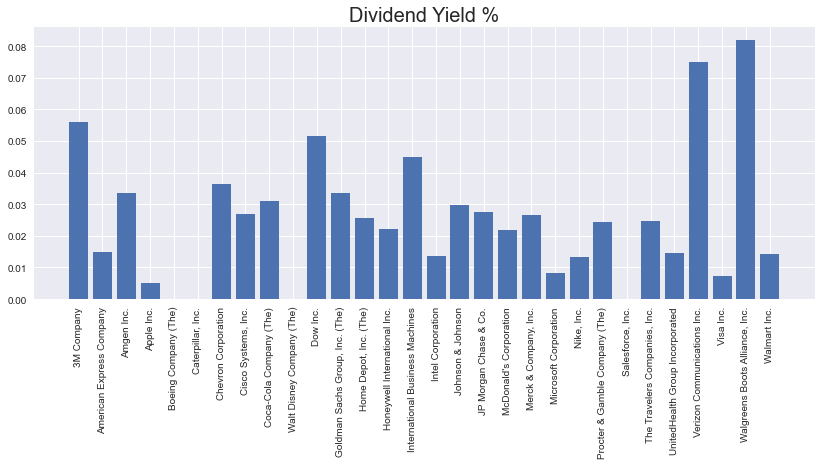

In [78]:
plt.figure(figsize= (14,5))
plt.bar(pd2['shortName'], pd2['dividendYield'])
plt.xticks(rotation = 90)
plt.title("Dividend Yield %", fontsize = 20)
plt.show()

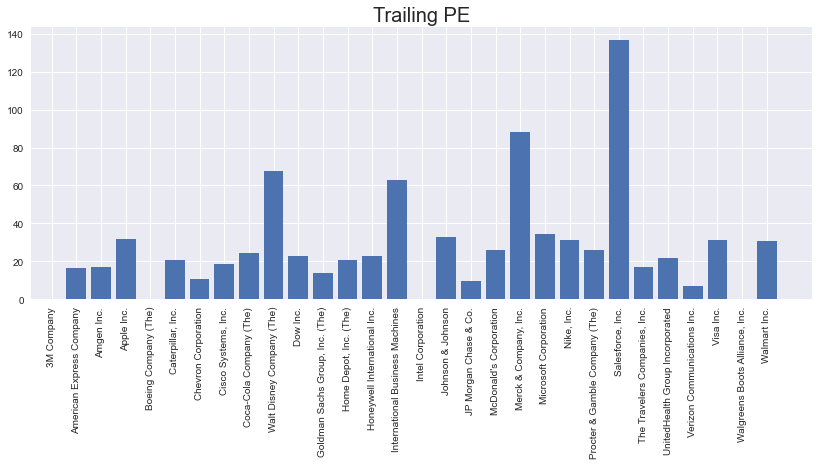

In [59]:
plt.figure(figsize= (14,5))
plt.bar(pd2['shortName'], pd2['trailingPE'])
plt.title("Trailing PE", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

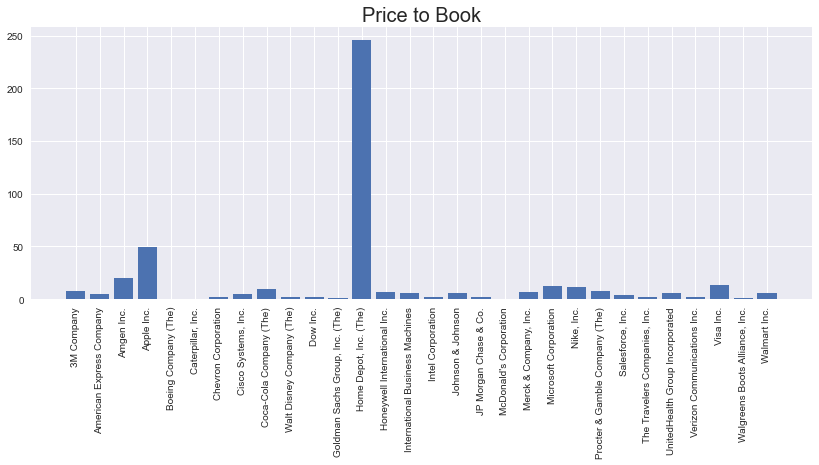

In [60]:
plt.figure(figsize= (14,5))
plt.bar(pd2['shortName'], pd2['priceToBook'])
plt.title("Price to Book", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

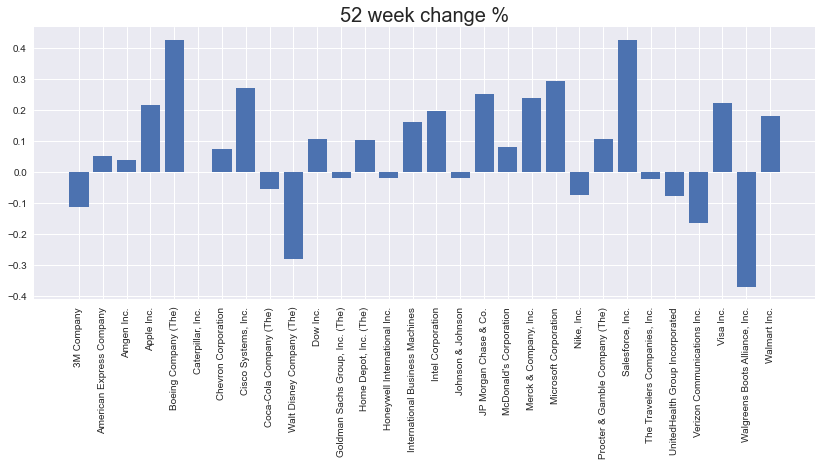

In [77]:
plt.figure(figsize= (14,5))
plt.bar(pd2['shortName'], pd2['52WeekChange'])
plt.title("52 week change %", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

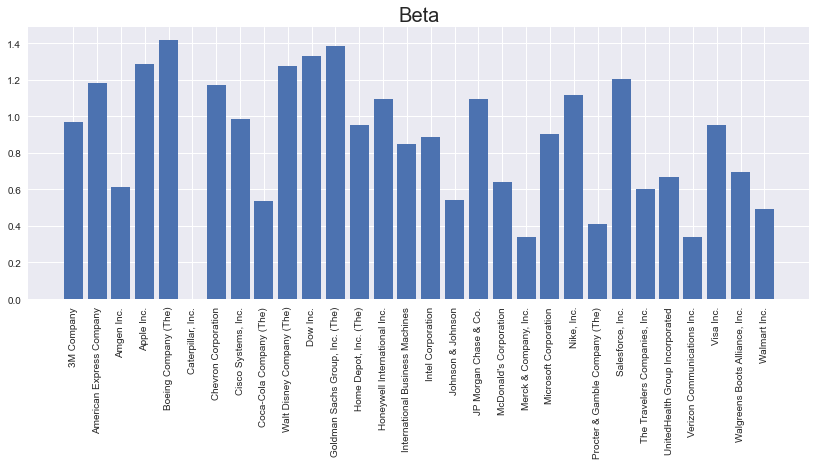

In [62]:
plt.figure(figsize= (14,5))
plt.bar(pd2['shortName'], pd2['beta'])
plt.title("Beta", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

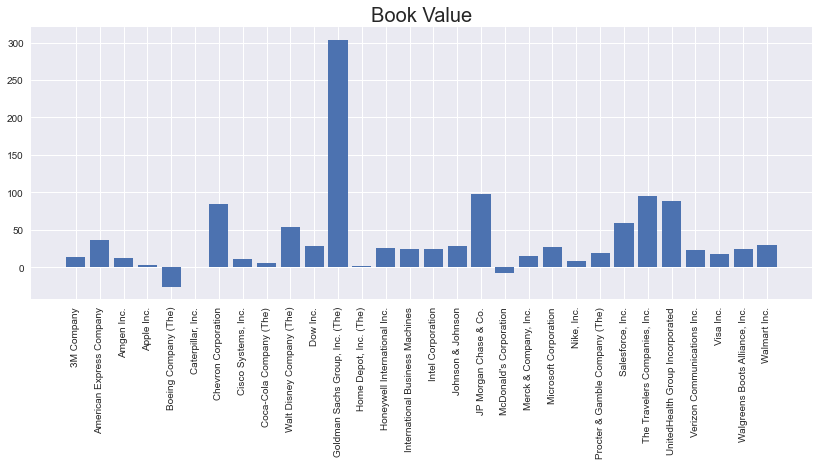

In [63]:
plt.figure(figsize= (14,5))
plt.bar(pd2['shortName'], pd2['bookValue'])
plt.title("Book Value", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

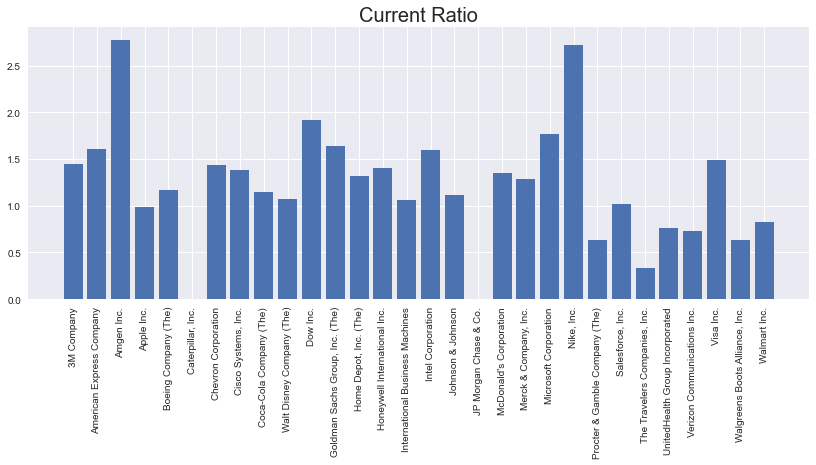

In [64]:
plt.figure(figsize= (14,5))
plt.bar(pd2['shortName'], pd2['currentRatio'])
plt.title("Current Ratio", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

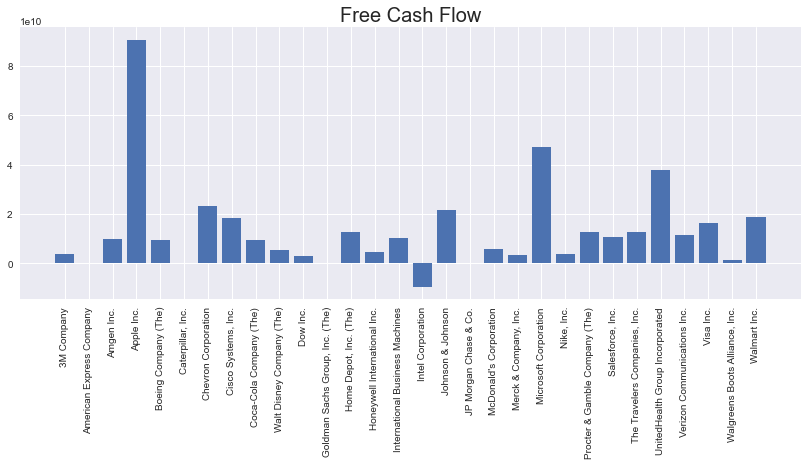

In [65]:
plt.figure(figsize= (14,5))
plt.bar(pd2['shortName'], pd2['freeCashflow'])
plt.title("Free Cash Flow", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

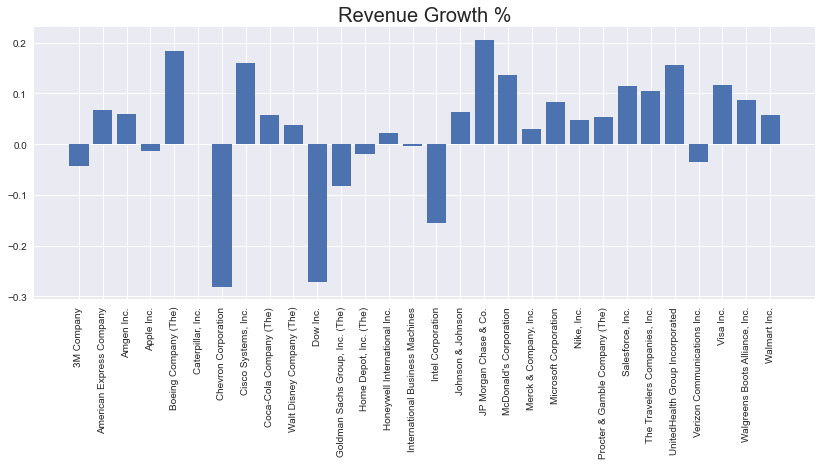

In [76]:
plt.figure(figsize= (14,5))
plt.bar(pd2['shortName'], pd2['revenueGrowth'])
plt.title("Revenue Growth %", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

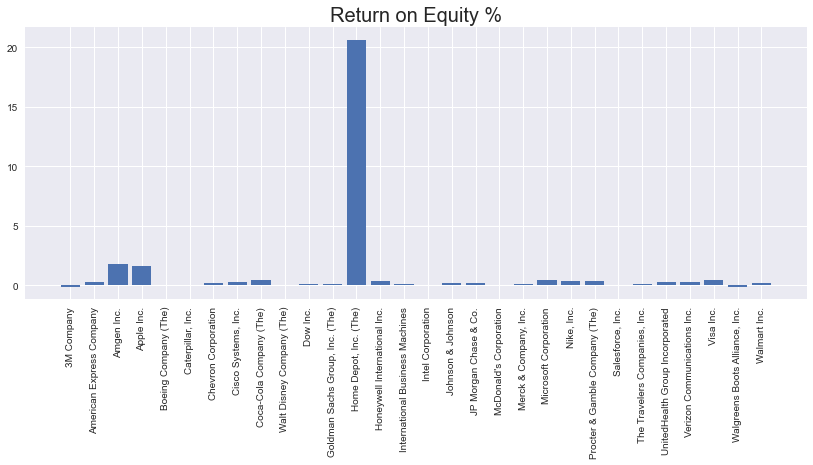

In [75]:
plt.figure(figsize= (14,5))
plt.bar(pd2['shortName'], pd2['returnOnEquity'])
plt.title("Return on Equity %", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

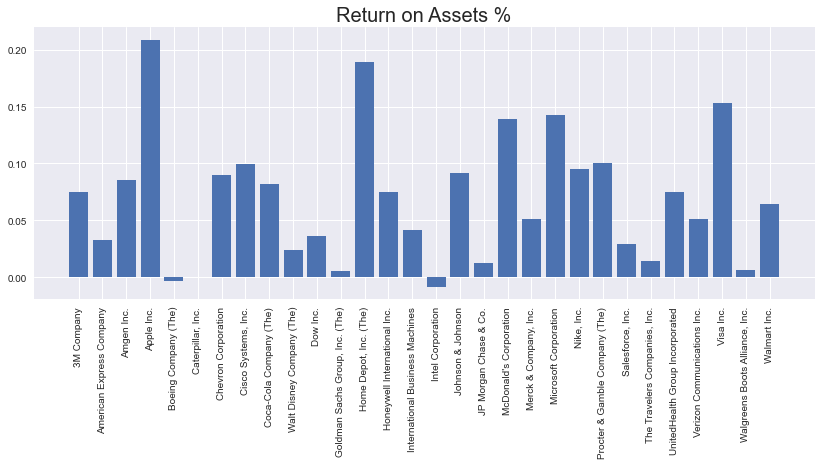

In [72]:
plt.figure(figsize= (14,5))
plt.bar(pd2['shortName'], pd2['returnOnAssets'])
plt.title("Return on Assets %", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

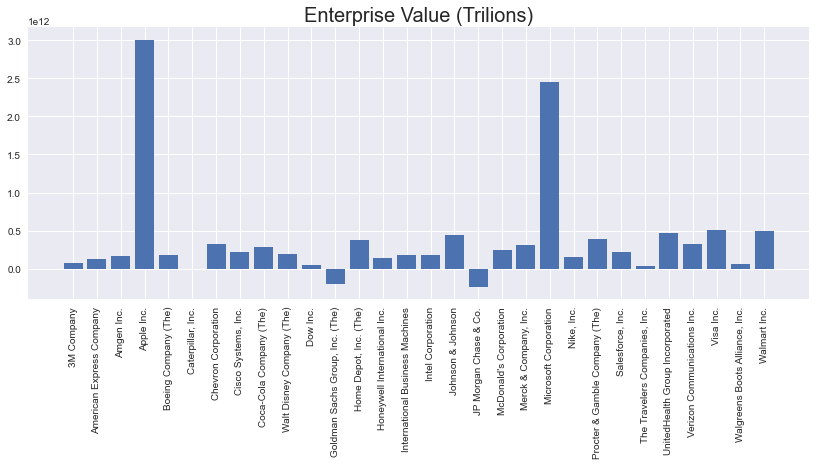

In [71]:
plt.figure(figsize= (14,5))
plt.bar(pd2['shortName'], pd2['enterpriseValue'])
plt.title("Enterprise Value (Trilions)", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

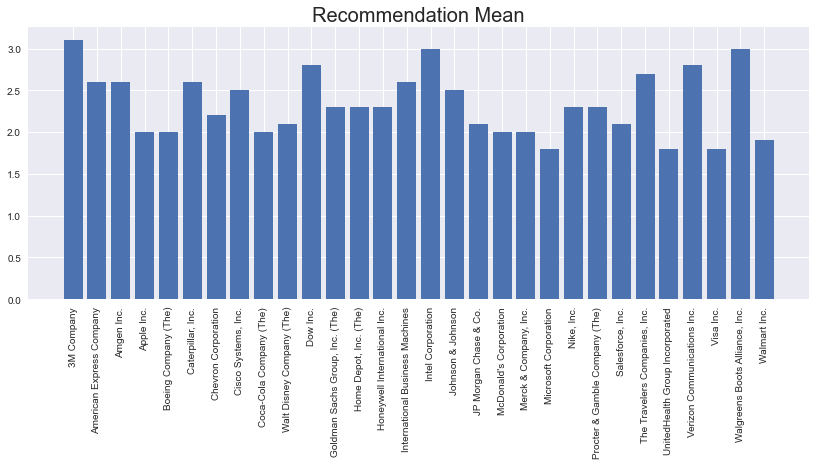

In [70]:
plt.figure(figsize= (14,5))
plt.bar(pd2['shortName'], pd2['recommendationMean'])
plt.title("Recommendation Mean", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()